<a href="https://colab.research.google.com/github/didacuscha/Maths_for_AI/blob/main/laboratorio3_distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

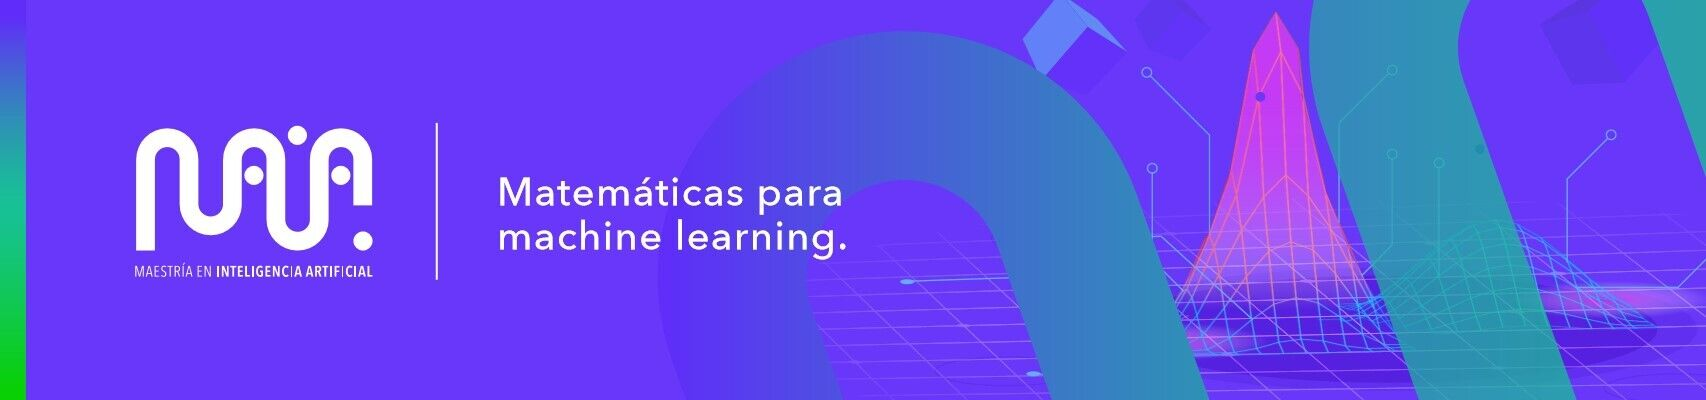

##**Laboratorio: cálculo de distancias**

En este laboratorio calcularemos la distancia entre un vector en $a\in\mathbb{R}^2$ y otros vectores dados. El objetivo principal es determinar los vecinos más cercanos al vector $a$ de acuerdo con diferentes formulaciones de distancias. Aquí, mostraremos que el concepto de cercanía cambia dependiendo de la formulación de distancia usada.  

##**La distancia Euclidiana**

Antes de resolver el ejercicio propuesto, primero recordaremos la distancia Euclidiana. Esta es quizás la distancia más utilizada dentro del ámbito matemático y científico, y se define formalmente como la raiz de la suma de cuadrados de la diferencia entre cada componente de dos vectores. Es decir, si se tienen dos vectores $a$ y $b$, cada uno en $\mathbb{R}^n$, la distancia Euclidiana se calcula de la siguiente manera:

$$d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2}$$

Otra forma de escribir la expresión anterior es a través de la norma L2 de la forma $||a - b||_2$. Esta operación puede realizarse usando el paquete numpy  invocando la función ***norm*** del paquete ***linalg*** como se muestra a continuación:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Se definen dos vectores a y b
a = np.array([2,4,5,3,4])
b = np.array([4,3,7,0,2])

#Se utiliza la función norm de linalg para hallar la norma de la diferencia entre vectores
norma = np.linalg.norm(a - b)
print("La distancia Euclidiana entre a y b es:",norma)


La distancia Euclidiana entre a y b es: 4.69041575982343


##**Distancia del coseno**

La similitud del coseno es una herramienta que calcula la similitud de dos vectores dados basándose en el coseno del ángulo formado entre ellos. Así, si el ángulo entre dos vectores es cercano a 0, la similitud del coseno va a ser muy cercana a 1, mientras que en caso de que los vectores sean ortogonales su distancia del coseno va a ser de 0.  Si los dos vectores tienen un ángulo cercano a 180° entre ellos, su similitud va a ser cercana a -1. Esta similitud no tiene en cuenta la magnitud, sino la dirección entre los vectores.

La similitud del coseno se define de la siguiente forma:

$$s_\theta(a,b) = \frac{a^T b}{||a||_2 \ ||b||_2},$$

donde $a^Tb$ es el producto punto entre los vectores, y $||a||_2||b||_2$ es el producto de las magnitudes de los vectores.

Ahora, usando esta similitud, se puede definir la distancia del coseno como:
$$d(a,b)=1-s_\theta(a,b).$$
Entre más parecido sea el ángulo entre los vectores, más cercano a cero será esta distancia. Esta no satisface las condiciones para ser una métrica de $\mathbb{R}^2$. Sin embargo, es ampliamente usada en machine learning para definir discrepancias entre vectores. Esta operación puede realizarse usando ***cosine*** del módulo ***spatial.distance*** del paquete ***scipy*** como se muestra a continuación:

In [2]:
from scipy import spatial

#Se definen dos vectores a y b
a = np.array([2,4,5,3,4])
b = np.array([4,3,7,0,2])

#Se utiliza la función cosine del paquete spatial.distance para calcular la distancia del coseno
dist = spatial.distance.cosine(a,b)
print("La distancia del coseno de los vectores a y b es:",dist)


La distancia del coseno de los vectores a y b es: 0.1474021599117924


##**Ejercicio**
Ahora si procedemos a calcular la distancia entre un vector de referencia y otros vectores dados usando diferentes formas de distancia.




**1. Generar vectores en $\mathbb{R}^2$**

El primer paso es generar y graficar el vector $a$ y los vectores sobre los cuales calcularemos las distancias. Para esto, generamos 20 vectores de forma aleatoria usando la función de numpy llamada ***randint*** del paquete ***random***. Entre esos vectores, está el vector de referencia $a$ que se grafica en rojo.

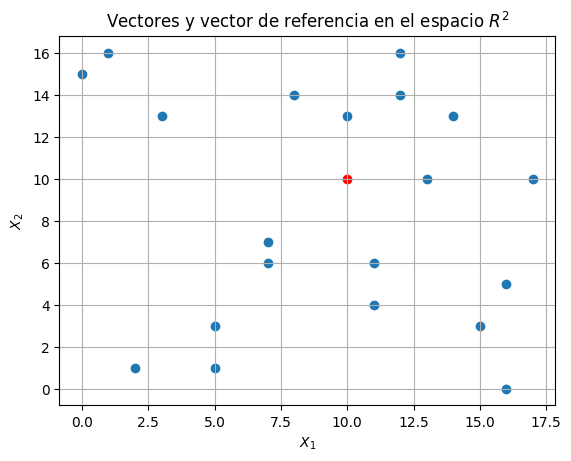

In [3]:
#En primer lugar, definimos m vectores bi-dimensionales siendo m = 20. Estos vectores los generamos de forma aleatoria.

np.random.seed(88)
vectores = np.random.randint(0,20,(20,2))

#Definimos el vector de referencia al que queremos encontrar la distancia con el rsto
a = np.array([10,10])

#Graficamos en un scatter plot los vectores y el vector de referencia.
plt.figure()
plt.grid()
plt.title("Vectores y vector de referencia en el espacio $R^2$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(vectores[:,0],vectores[:,1])
plt.scatter(a[0],a[1],c="red")
plt.show()

**2. Puntos más cercanos usando la distancia Euclidiana**

Se desea conocer cuales son los 5 vectores más cercanos al punto de referencia usando la distancia Euclidiana. Para esto, se calcula la distancia del punto a cada vector. Note que en este caso se utiliza la función ***norm*** del paquete linalg de numpy con el argumento *axis*, que indica que la variable *vectores* son 20 vectores de 2 componentes cada uno y que se desea conocer la norma del punto con cada uno de los 20 vectores.

In [4]:
#Calculamos la distancia euclidiana del punto dado a cada vector
distancias = np.linalg.norm(a - vectores,2,axis=1)
print("Las distancias del punto $a$ a cada vector son:")
for i,j in enumerate(distancias,start=1):
  print(f"Distancia a vector {i}: {j}")

Las distancias del punto $a$ a cada vector son:
Distancia a vector 1: 11.180339887498949
Distancia a vector 2: 7.0
Distancia a vector 3: 10.295630140987
Distancia a vector 4: 7.810249675906654
Distancia a vector 5: 6.324555320336759
Distancia a vector 6: 12.041594578792296
Distancia a vector 7: 6.082762530298219
Distancia a vector 8: 4.242640687119285
Distancia a vector 9: 5.0
Distancia a vector 10: 3.0
Distancia a vector 11: 7.615773105863909
Distancia a vector 12: 10.816653826391969
Distancia a vector 13: 4.47213595499958
Distancia a vector 14: 4.47213595499958
Distancia a vector 15: 4.123105625617661
Distancia a vector 16: 11.661903789690601
Distancia a vector 17: 8.602325267042627
Distancia a vector 18: 3.0
Distancia a vector 19: 8.602325267042627
Distancia a vector 20: 5.0


Posteriormente, ordenamos las distancias de menor a mayor y tomamos las 5 primeras posiciones, Ees decir, los índices de los 5 vectores más cercanos.

In [5]:
orden = np.argsort(distancias)
primeras_5_posiciones = orden[:5]

Seleccionamos los vectores correspondientes a las 5 posiciones más cercanas y graficamos todo:

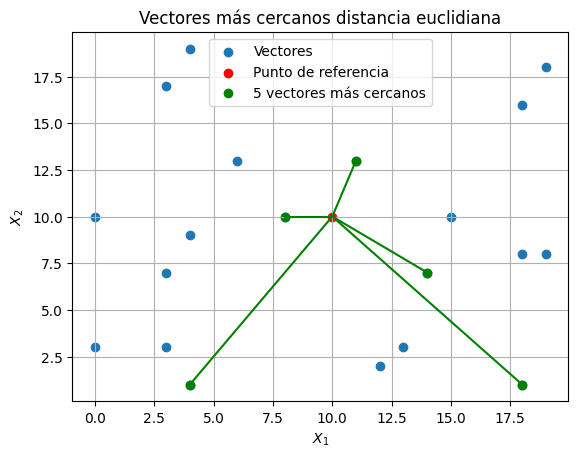

In [12]:
vectores_mas_cercanos = vectores[primeras_5_posiciones]

plt.figure()
plt.grid()
plt.title("Vectores más cercanos distancia euclidiana")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(vectores[:,0],vectores[:,1],label="Vectores")
plt.scatter(a[0],a[1],c="red",label="Punto de referencia")
plt.scatter(vectores_mas_cercanos[:,0],vectores_mas_cercanos[:,1],color="g",label="5 vectores más cercanos")
for i in vectores_mas_cercanos:
  plt.plot([a[0],i[0]],[a[1],i[1]],"g")
plt.legend()
plt.show()

**3. Puntos más cercanos usando la distancia del Coseno**

Se desea conocer cuales son los 5 vectores más cercanos al punto de referencia usando la distancia del coseno. Para esto, se calcula la distancia del punto de referencia a cada vector. En este caso, se calcula la distancia haciendo uso del objeto map de python dado que el método de la libreria scipy no soporta el argumento ***axis***.


In [7]:
#Calculamos la distancia euclidiana del punto dado a cada vector

distancias = np.array(list(map(spatial.distance.cosine,vectores,[a]*20)))
print("Las distancias del punto $a$ a cada vector son:")
for i,j in enumerate(distancias,start=1):
  print(f"Distancia a vector {i}: {j}")

Las distancias del punto $a$ a cada vector son:
Distancia a vector 1: 0.29289321881345254
Distancia a vector 2: 0.03200310183419919
Distancia a vector 3: 0.16794970566215628
Distancia a vector 4: 0.11416846471984465
Distancia a vector 5: 0.010050506338833531
Distancia a vector 6: 0.05131670194948623
Distancia a vector 7: 0.09381686000473466
Distancia a vector 8: 0.0
Distancia a vector 9: 0.0029455144984184
Distancia a vector 10: 0.008399588813778225
Distancia a vector 11: 0.1520016959949121
Distancia a vector 12: 0.2501621446349075
Distancia a vector 13: 0.03523617876226781
Distancia a vector 14: 0.0029455144984184
Distancia a vector 15: 0.04063449842872935
Distancia a vector 16: 0.29289321881345254
Distancia a vector 17: 0.029857499854668124
Distancia a vector 18: 0.008399588813778225
Distancia a vector 19: 0.16794970566215628
Distancia a vector 20: 0.0006851662332328923


Posteriormente, ordenamos las distancias de menor a mayor y tomamos las 5 primeras posiciones (es decir, los índices de los 5 vectores más cercanos).

In [8]:
orden = np.argsort(distancias)
primeras_5_posiciones = orden[:5]

Seleccionamos los vectores correspondientes a las 5 posiciones más cercanas y graficamos todo:

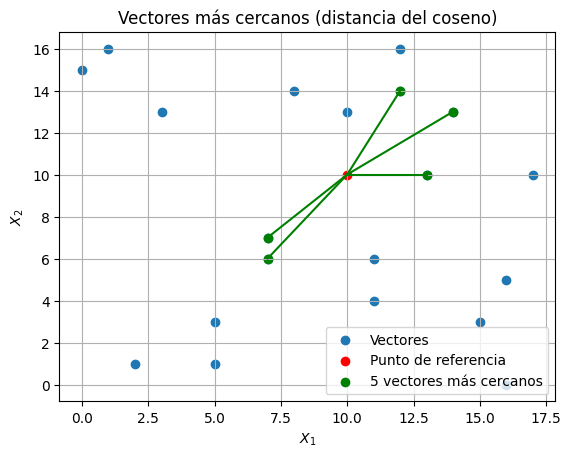

In [9]:
vectores_mas_cercanos = vectores[primeras_5_posiciones]

plt.figure()
plt.grid()
plt.title("Vectores más cercanos (distancia del coseno)")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(vectores[:,0],vectores[:,1],label="Vectores")
plt.scatter(a[0],a[1],c="red",label="Punto de referencia")
plt.scatter(vectores_mas_cercanos[:,0],vectores_mas_cercanos[:,1],color="g",label="5 vectores más cercanos")
for i in vectores_mas_cercanos:
  plt.plot([a[0],i[0]],[a[1],i[1]],"g")
plt.legend()
plt.show()

Note que los 5 vecinos más cercanos cambian dependiendo de la distancia usada. La distancia Euclidiana tiene en cuenta las magnitudes, mientras que la del coseno solamente la dirección.

##**Ejercicios adicionales**

**3.1.** Modifique el siguiente código para que grafique los 7 vectores más cercanos según la distancia euclidiana (asegúrese de que sean 7 puntos verdes).

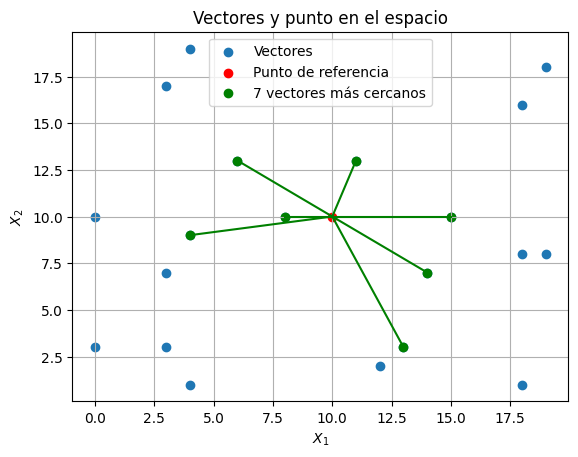

In [10]:
np.random.seed(44)
vectores = np.random.randint(0,20,(20,2))

punto = np.array([10,10])

distancias = np.linalg.norm(punto - vectores,2,axis=1)
orden = np.argsort(distancias)
primeras_7_posiciones = orden[:7]
vectores_mas_cercanos = vectores[primeras_7_posiciones]

plt.figure()
plt.grid()
plt.title("Vectores y punto en el espacio")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(vectores[:,0],vectores[:,1],label="Vectores")
plt.scatter(punto[0],punto[1],c="red",label="Punto de referencia")
plt.scatter(vectores_mas_cercanos[:,0],vectores_mas_cercanos[:,1],color="g",label=f"{len(vectores_mas_cercanos)} vectores más cercanos")
for i in vectores_mas_cercanos:
  plt.plot([punto[0],i[0]],[punto[1],i[1]],"g")
plt.legend()
plt.show()

**3.2.** Modifique el siguiente código para que grafique los 7 vectores más cercanos según la distancia del coseno (asegúrese de que sean 7 puntos verdes).

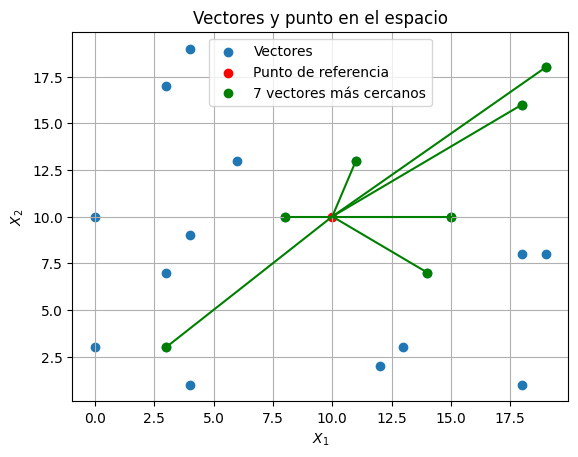

In [11]:
np.random.seed(44)
vectores = np.random.randint(0,20,(20,2))

punto = np.array([10,10])

distancias = np.array(list(map(spatial.distance.cosine,vectores,[punto]*20)))
orden = np.argsort(distancias)
primeras_7_posiciones = orden[:7]
vectores_mas_cercanos = vectores[primeras_7_posiciones]

plt.figure()
plt.grid()
plt.title("Vectores y punto en el espacio")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.scatter(vectores[:,0],vectores[:,1],label="Vectores")
plt.scatter(punto[0],punto[1],c="red",label="Punto de referencia")
plt.scatter(vectores_mas_cercanos[:,0],vectores_mas_cercanos[:,1],color="g",label=f"{len(vectores_mas_cercanos)} vectores más cercanos")
for i in vectores_mas_cercanos:
  plt.plot([punto[0],i[0]],[punto[1],i[1]],"g")
plt.legend()
plt.show()

**3.3.** Responda:

 - ¿Qué diferencias notables se observan entre los vectores más cercanos utilizando distancia euclidiana y distancia del coseno en las gráficas generadas?

 	Distancia Euclidiana :
  
	•	Los vectores más cercanos están físicamente cerca del punto rojo (referencia).
	•	Se prioriza la proximidad absoluta en el espacio, sin importar la orientación o dirección.
	•	Puedes ver vectores dispersos direccionalmente, pero pegados al punto.

	Distancia Euclidiana :

	•	Los vectores seleccionados están más alineados en dirección al punto de referencia, aunque más lejanos físicamente.
	•	Se prioriza que formen ángulos pequeños con el vector del punto rojo, sin importar la distancia total.
	•	Algunos vectores más alejados en magnitud son considerados cercanos si apuntan en la misma dirección.


- ¿Cuál es la característica que más pesa (magnitud o dirección) en cada tipo de distancia y por qué?

  La euclideana minimiza la distancia en linea recta. La orientacionn no importa tanto como la proximidad total en el espacio.

  La de coseno solo le importa si los vectores apuntan en la misma direccion. La magnitud se normaliza y por lo tanto no influye